# 04 Homework
© Copyright: 2024, Selma Hadzic, all rights reserved.

#### Number of points: 15 (weights 15% in the final grade)


1. Pull from the `ESMT_2024_DataScraping_Lectures` repository: you should get this `04_Homework` file
2. Launch VS Code and open your working-folder
3. Create a `Session_04` folder, in which you create another folder called `data`
4. Copy paste the notebook `04_Homework` from the lectures repo to the working-folder. Copy the csv file `WHO_COVID19_cases.csv` into the `working-folder/Session_04/data` directory.
5. Do the exercises on 04_Homework in your working-folder
6. Once you are finished, copy-Paste the notebook into `ESMT_2024_DataScraping_Students` folder in your computer
8. Commit and push your homework in your branch before the deadline

#### Deadline: October 24th 01:29 pm CET

#### Any missed deadline without justification to the Administration will result in 0 points for this homework.
#### If the Github branch is not correctly named using the indicated format **LASTNAME_firstname**, then a penalty of -2 points will be applied

## Dataset: use the WHO_COVID19_cases.csv dataset from Session_01

## 1- Filter the data for 3 countries and draw a line plot for Cumulative_cases vs Date_reported using seaborn (7.5 points)

*Tip: you may want to explore `plt.xticks(rotation=90);` and `plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6)) ;` to unclutter the dates on the x-axis*

In [17]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.ticker as ticker

In [18]:
data = pd.read_csv('./data/WHO_COVID19_cases.csv')
data.head()

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
0,2020-01-05,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
1,2020-01-12,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
2,2020-01-19,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
3,2020-01-26,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0
4,2020-02-02,AF,Afghanistan,Asia,EMRO,NaN,0,NaN,0


In [19]:
df = data[data['Country'].isin(['Finland', 'Sweden', 'Norway'])]
df

,Date_reported,Country_code,Country,Continent,WHO_region,New_cases,Cumulative_cases,New_deaths,Cumulative_deaths
17324,2020-01-05,FI,Finland,Europe,EURO,NaN,0,NaN,0
17325,2020-01-12,FI,Finland,Europe,EURO,NaN,0,NaN,0
17326,2020-01-19,FI,Finland,Europe,EURO,NaN,0,NaN,0
17327,2020-01-26,FI,Finland,Europe,EURO,NaN,0,NaN,0
17328,2020-02-02,FI,Finland,Europe,EURO,1.0,1,NaN,0
...,...,...,...,...,...,...,...,...,...
51235,2024-08-04,SE,Sweden,Europe,EURO,630.0,2755181,29.0,27401
51236,2024-08-11,SE,Sweden,Europe,EURO,814.0,2755995,34.0,27435
51237,2024-08-18,SE,Sweden,Europe,EURO,926.0,2756921,42.0,27477
51238,2024-08-25,SE,Sweden,Europe,EURO,912.0,2757833,50.0,27527


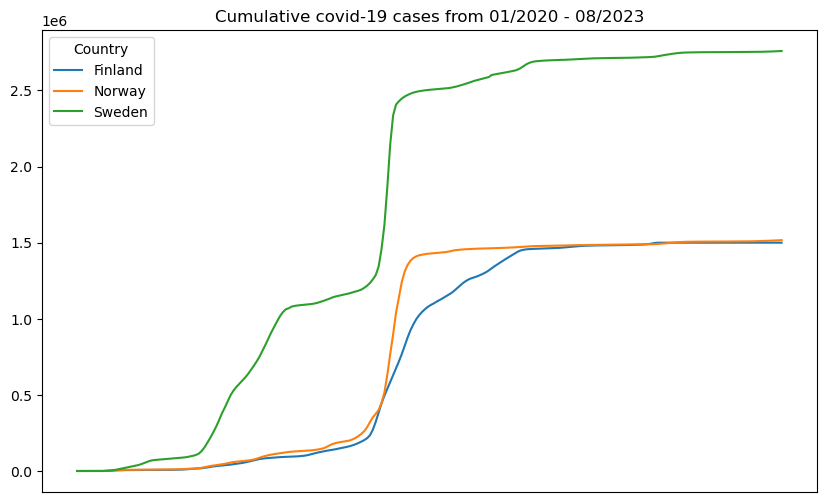

In [22]:
plt.figure(figsize=(10, 6))
sns.lineplot(x='Date_reported', y='Cumulative_cases', data=df, hue='Country').set(title='Cumulative covid-19 cases from 01/2020 - 08/2023')
plt.xticks(rotation=90)
plt.gca().xaxis.set_major_locator(ticker.MultipleLocator(6))
plt.ylabel('')
plt.xlabel('Date')
plt.gca().get_xaxis().set_visible(False)
plt.show()

## 2- Make a line plot showing the cumulative_deaths vs cumulative_cases for 3 countries using `plotly` (7.5 points)

In [23]:
import plotly.express as px
import plotly.io as pio
 
pio.renderers.default = 'notebook' 

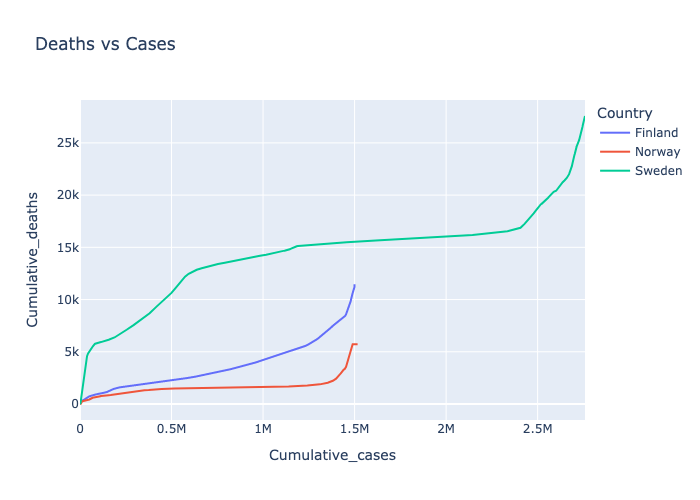

In [29]:
fig = px.line(
    df, 
    x='Cumulative_cases', 
    y='Cumulative_deaths',
    color='Country',
    title=" Deaths vs Cases"
)

fig.show(renderer="png")